

<div style="text-align: justify; width: 80%; background-color:; border: 0px solid green; line-height: 1.8; font-size: 18px;">

# **Introdução**

<div style="display: flex; justify-content: left; align-items: center;">

![Minha Foto](marketing2.jpg)

</div>

Grandes empresas têm o seu sucesso alcançado através do marketing, certo? Sim, isso já é bem estabelecido nos atuais mercados em nível global, na verdade as vendas e os estoques estão intimamente relacionadas com o marketing e este último sempre requer atualizações nas estratégias e no planejamento das campanhas de marketing.

Um dos grandes problemas dentro de muitas empresas é com a gestão de estoques, sendo assim, os gestores precisam ser muito eficientes em descobrir exatamente as formas mais adequadas de utilizar os recursos disponíveis para alocar os esforços em marketing e vendas, a fim de que não faltem produtos para atender as demandas dos clientes após as ações de marketing ou que muitos produtos fiquem estagnados nos estoques da empresa após um erro nos valores investidos em campanhas de marketing.

Os gestores precisam saber exatamente o montante físico e em valores que constam no inventário, uso de softwares adequados ajudam muito esse saber e qual deve ser o montante a ser adquirido para outros períodos de acordo com um histórico ou linha de tendência.

O departamento de marketing cria expectativas e promessas a respeito dos produtos através de suas campanhas, no entanto, os profissionais de marketing não têm como estimar exatamente se as mensagens que transmitem ao público são suficientes ou não e para que isso funcione de fato é necessária uma estreita comunicação a com a gestão de vendas e de estoque e garantir que as campanhas de marketing tenham sucesso.

Basicamente uma das formas de estimar corretamente a alocação dos recursos é traçar uma linha de tendência entre os investimentos anteriores em marketing com os montantes em estoque para cada investimento anterior e conhecer melhor a relação entre essas duas variáveis, isso pode ser feito com o auxílio da tecnologia, mais precisamente com o uso do Machine Learning e Regressão Linear e por fim estimar o montante a ser alocado aos estoques após a definição de um determinado valor a ser investido em novas campanhas.
</div>

<hr>

# **Pergunta?**

> Qual deverá ser o montante aproximado (em valores) do estoque da empresa para atender as conversões dos clientes para um total de **75.000** de investimento?

<hr>

> **Nota**
> 
> Para este projeto será usado uma base de dados fictícia em formato **`.csv`** de nome **`investimento_montante_estoque.csv`** que contém apenas 7 linhas, não é suficiente, mas que possibilita ter uma noção de como o **`Machine Learning`** e a **`Regressão Linear`** podem ajudar a responder muitas perguntas no mundo dos negócios. O arquivo esta no [link](https://raw.githubusercontent.com/Sandro-Alexandre-Olmedo/machine-learning-para-estimativa-do-valor-em-estoque-modulo-25.11-Ebac/refs/heads/main/investimento_montante_estoque.csv). 
>
> A mesma regra pode ser utilizada para responder a várias perguntas de outras áreas de negócios ou segmentos.

<hr>

# **Execução**

- **Importação das bibliotecas**

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- **Link dos dados**

In [72]:
url = 'https://raw.githubusercontent.com/Sandro-Alexandre-Olmedo/machine-learning-para-estimativa-do-valor-em-estoque-modulo-25.11-Ebac/refs/heads/main/investimento_montante_estoque.csv'

- **Leitura dos dados**

In [ ]:
marketing = pd.read_csv(url, sep=',')

- **Exploração dos dados**

In [59]:
marketing.head(10)

,investimento_marketing,m_estoque
0,20.0,118.0
1,25.0,142.0
2,40.0,225.0
3,52.0,260.0
4,67.0,295.0
5,72.0,335.0
6,81.0,364.0


In [60]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investimento_marketing  7 non-null      float64
 1   m_estoque               7 non-null      float64
dtypes: float64(2)
memory usage: 244.0 bytes


In [71]:
marketing.shape

(7, 2)

In [61]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
investimento_marketing,7.0,51.000000,23.650229,20.0,32.5,52.0,69.5,81.0
m_estoque,7.0,248.428571,93.132266,118.0,183.5,260.0,315.0,364.0


<hr>

- **Apresentação gráfica da `relação linear` entre as váriaveis**

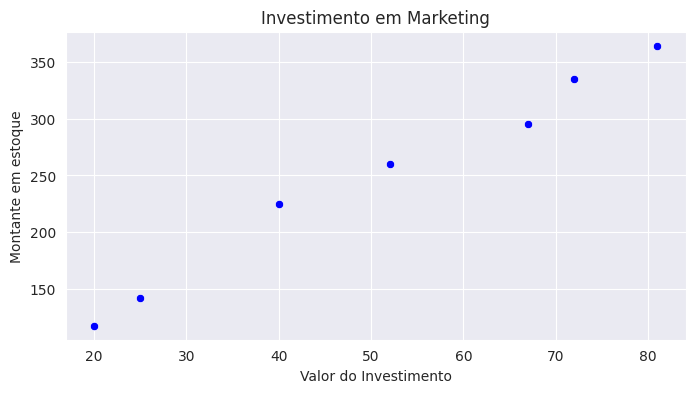

In [62]:
with sns.axes_style('darkgrid'):
  
  grafico = sns.scatterplot(data=marketing, x='investimento_marketing', y='m_estoque', color='blue')

  grafico.set(title='Investimento em Marketing', xlabel='Valor do Investimento', ylabel='Montante em estoque')

  grafico.figure.set_size_inches(8, 4)

> **Nota**
>
> Evidentemente existe um relacionamento linear entre as váriaveis `investimento_marketing` e `m_estoque`, ou seja, conforme o investimento em marketing for maior, maior deverá ser o estoque!

<hr>

# **Como responder a pergunta com Machine Learning e Regressão Linear**

- Aprendizado de Máquina com o módulo **scikit-learn** para o modelo de `Regressão Linear`

In [63]:
from sklearn import linear_model

In [64]:
reg_linear = linear_model.LinearRegression()

- **Método .fit**

> **Nota**
>
> O método `.fit` realiza o treinamento com os dados fornecidos (x e y), e encontra os coeficientes que minimizam o erro quadrático entre os rótulos previstos e reais.

In [65]:
reg_linear.fit(marketing['investimento_marketing'].values.reshape(-1, 1), marketing['m_estoque'])

LinearRegression()

> **Nota**
>
> Aqui é necessário fazer o uso do método `.reshape(-1, 1)` do `numpy`, pois a coluna **investimento_marketing** é uma série de apenas uma dimensão(1d) e o método `.fit` requer duas dimensões, também é necessário informar o método `.values` antes do método `.reshape(-1, 1)` para que o array com os valores da coluna seja retornado e assim fazer o reshape(mudar a forma do array).
>
> Mais informações acesse a documentação do `Scikit-learn` no [link](https://scikit-learn.org/stable/glossary.html).

- **Coeficiente angular da reta**

In [66]:
reg_linear.coef_ 

array([3.90643623])

> **Nota**
>
> O coeficiente angular de uma reta é uma medida que indica a inclinação da reta em relação ao eixo `x` do plano cartesiano.

- **Coeficiente linear onde a reta corta o eixo `x` e `y`**

In [67]:
reg_linear.intercept_ 

np.float64(49.200323514387804)

> **Nota**
>
> O `reg_linear.intercept_ ` ou intercepto é o valor de y quando x = 0. Em outras palavras, ele indica onde a linha da regressão cruza o eixo y, intercept_ é um atributo do objeto após o modelo ser treinado, ele armazena o valor do intercepto, esse valor será um ponto indicado em um gráfico ligando o eixo `x` com o eixo `y` (correlação).

- Usar o **`reg_linear.coef_`** e  **`reg_linear.intercept_`** para traçar uma nova reta e passar pelos pontos **`x`** e **`y`**

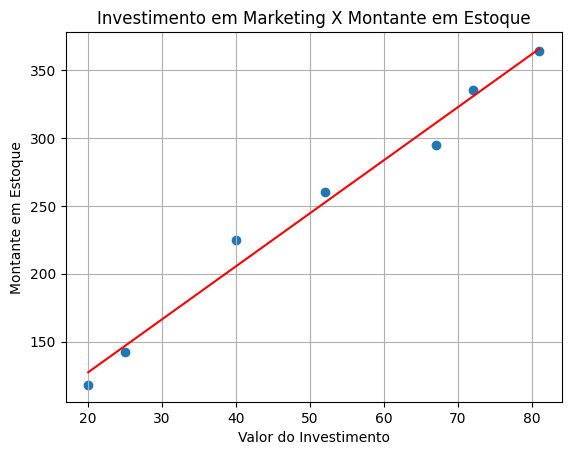

In [68]:
plt.scatter(marketing['investimento_marketing'], marketing['m_estoque'])

x = np.array(marketing['investimento_marketing'])

y = reg_linear.intercept_ + x*reg_linear.coef_

plt.title('Investimento em Marketing X Montante em Estoque')

plt.xlabel("Valor do Investimento")

plt.ylabel("Montante em Estoque")

plt.grid(True)

plt.plot(x, y, 'r')

plt.show()

> **Nota**
>
> Nota-se que a reta quase que liga boa parte dos pontos, sendo assim, temos uma correlação positiva entre as variáveis, o que nos permite assumir esse modelo de regressão linear é válido na predição ou estimativa do montante em estoque após o investimento sugerido, ou seja, a relação entre valores gastos com marketing e o montante em estoque são boas.

<hr>

- **Predição para um investimento de 75.000**

In [69]:
reg_linear.predict([[75]])

array([342.18304104])

- **Traçar um nova reta que passe exatamente em cima do ponto do valor predito **`reg_linear.predict`**

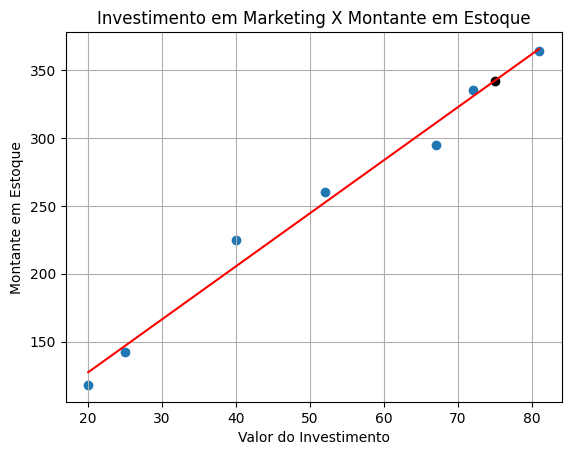

In [70]:
plt.scatter(marketing['investimento_marketing'], marketing['m_estoque'])

plt.scatter(75, reg_linear.predict([[75]])[0], color='black')

x = np.array(marketing['investimento_marketing'])

y = reg_linear.intercept_ + x*reg_linear.coef_

plt.title('Investimento em Marketing X Montante em Estoque')

plt.xlabel("Valor do Investimento")

plt.ylabel("Montante em Estoque")

plt.grid(True)

plt.plot(x, y, 'r')

plt.show()

> **Nota**
>
> Após a aplicação do **`Machine Learning`** e **`Regressão Linear`** foi marcado um `ponto preto` no gráfico definindo os pontos **`x`** e **`y`**, predizendo assim o montante a ser alocado em estoque.

<hr>

# **Resposta:**
>
> O valor aproximado a ser alocado ao estoque após um investimento de `75.000` em marketing será de aproximandamente:

# **`342.000`**

<hr>


<div style="text-align: justify; width: 80%; background-color:; border: 0px solid green; line-height: 1.8; font-size: 18px;">

# **Storytelling**

Este foi apenas um breve e simples projeto de `Machine Learning`, no entanto, poderoso em grandes aplicações dentro das empresas quando existem grandes volumes de dados, porém difíceis de entender ou prever para as tomadas de decisão no mundo dos negócios ou em outras áreas.

A `Regressão Linear` desempenha um papel muito importante quando o objetivo é identificar padrões e tendências, no qual, os dados apresentam comportamento de crescimento ou decaimento linear e assim ajudar a prever valores futuros dos dados e posteriormente tomar decisões inteligentes baseado em dados.

Após alguns Ajustes dos dados do modelo de regressão linear com o método `.fit`, conseguimos localizar o coeficiente angular através da função ` reg_linear.coef_` (`3.90643623`). Esse coeficiente é uma medida que indica a inclinação da reta em relação ao eixo x do plano cartesiano.

Posteriormente o `reg_linear.intercept_`(`49.200323514387804`) ou intercepto nos trouxe o valor de `y` quando `x` = 0. Em outras palavras, ele indica onde a linha da regressão cruza o eixo `y`, `intercept_` é um atributo do objeto após o modelo ser treinado, ele armazena o valor do intercepto, esse valor será um ponto indicado em um gráfico ligando o eixo `x` com o eixo `y` (correlação). 

Usamos os valores das duas funções `reg_linear.coef_` e `reg_linear.intercept_` para traçar uma reta entre os eixos x e y em um gráfico de dispersão(scatter) do pacote Matplotlib, a reta quase que liga boa parte dos pontos, sendo assim, temos uma correlação positiva entre as variáveis, o que nos permite assumir esse modelo de regressão linear é válido na predição ou estimativa do montante em estoque após o investimento sugerido, ou seja, a relação entre valores gastos com marketing e o montante em estoque são boas.

Usamos a função `reg_linear.predict([[75]])` com o valor a ser investido para prever o montante que deverá ser alocado ao estoque.

Por fim, criamos um novo gráfico de dispersão(scatter) traçando uma reta e marcando um ponto preto no gráfico através dos valores ou coordenadas encontrados nas funções `reg_linear.coef_` e `reg_linear.intercept_`.

Novamente, nota-se que a reta quase que liga boa parte dos pontos, sendo assim, temos uma correlação positiva entre as variáveis, o que nos permite assumir que esse modelo de regressão linear de predição ou estimativa do montante em estoque é boa, ou seja, a relação entre valores gastos com marketing e o montante em estoque estão corretas.

</div>






